# Read data and import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/BATADAL_dataset03.csv')
df.head()

DATETIME      L_T1      L_T2      L_T3      L_T4      L_T5      L_T6  \
0  06/01/14 00  0.509730  2.049003  3.191145  2.792634  2.656091  5.316831   
1  06/01/14 01  0.412580  2.009072  3.642565  2.831673  3.126387  5.494855   
2  06/01/14 02  0.320112  1.986093  4.140192  3.256733  3.574601  5.500000   
3  06/01/14 03  0.332879  2.009203  4.673478  3.744497  3.952379  5.500000   
4  06/01/14 04  0.483496  2.089049  5.237937  4.409456  3.504676  5.500000   

       L_T7      F_PU1  S_PU1  ...     P_J256     P_J289     P_J415  \
0  1.562321  98.998444      1  ...  87.605774  26.495605  84.206619   
1  1.852043  99.095901      1  ...  89.448341  26.487326  85.900085   
2  2.246126  98.420959      1  ...  91.056114  26.487364  86.582474   
3  3.203573  97.575172      1  ...  92.594353  26.575815  88.020546   
4  4.439714  97.351059      1  ...  94.473099  26.723457  90.422462   

      P_J302     P_J306     P_J307     P_J317      P_J14     P_J422  ATT_FLAG  
0  18.901676  81.983734  18.791777  67.125603  29.387470  28.487471         0  
1  18.849329  82.150589  18.739643  67.178696  29.354256  28.454256         0  
2  19.597170  83.988579  19.496712  72.425293  29.354538  28.454538         0  
3  26.028486  64.670486  25.922703  76.275040  29.449951  28.549952         0  
4  26.209970  64.746620  26.104692  76.703529  29.574265  28.674263         0  

[5 rows x 45 columns]

# Create correlation matrix

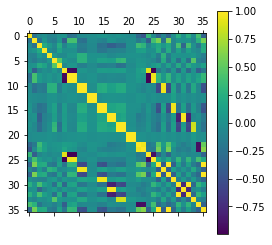

In [6]:
## remove the prediction attribute: ATT_FlAG
## remove the timestamp
filtered_df = df.copy()
filtered_df = filtered_df.drop(columns=['ATT_FLAG', 'DATETIME'])

# constants cannot be used to detect s
constants = [x for x in filtered_df if np.std(filtered_df[x]) == 0]
filtered_df = filtered_df.drop(columns=constants)

# plot the correlation matrix
plt.matshow(filtered_df.corr())
plt.colorbar()
plt.show()


# Plot the cyclic behaviour of F_PU1 and P_J280 in 1 plot
# The correlation was found inside the correlation matrix

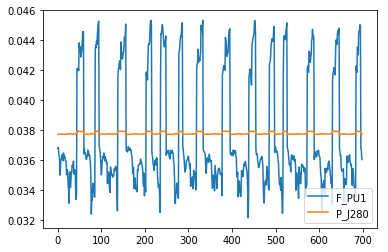

In [11]:
import sklearn
from sklearn.preprocessing import normalize
attributes = list(df.corr())
fpu1 = 7
pj280 = 31
# normalize to show both in one plot
plt.plot(normalize(df[attributes[fpu1]][:700].values.reshape(1, -1)).reshape(-1, 1), label=attributes[fpu1])
plt.plot(normalize(df[attributes[pj280]][:700].values.reshape(1, -1)).reshape(-1, 1), label=attributes[pj280])
plt.legend()    
plt.show()

# Predict using an AR(5) model

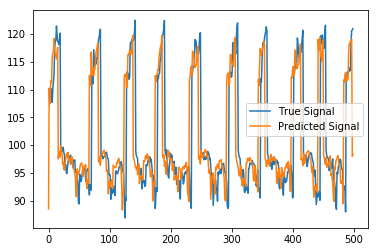

In [35]:
import statsmodels
from statsmodels.tsa.arima_model import AR

df2 = pd.read_csv('./datasets/BATADAL_dataset04.csv')
df2.columns = df2.columns.str.replace(' ', '')

signal = "F_PU1"

# define and fit the AR model
p = 5
model = AR(df[signal])
model_fit = model.fit(p)

# function for predicting next value in serie
def predict(coefficent, history):
    res = coefficent[0]
    for i in range(1, len(coefficent)):
        res += coefficent[i] * history[-i]
    return res

# define the test signal
test = df2[signal]
# obtain AR coefficients
ar_coef = model_fit.params
# keep the first p test signal values  
history = [df2[signal].iloc[x] for x in range(0,p)]

# Predictions are made in this section
predictions = list()
for t in range(p,len(test)):
    new_prediction = predict(ar_coef, history)
    predictions.append(new_prediction)
    old_value = test[t]
    history.append(old_value)

# plot first 500 values so that visualization of prediction is better visible
plt.plot(df2[signal][:500].iloc[p:])
plt.plot(predictions[:500])
plt.legend(['True Signal','Predicted Signal'])
plt.show()